# 图像处理基础

在这个notebook里，我们学习数字图像处理的基础知识，为之后的卷积神经网络(CNN)打下基础。

目录：
- 图像在计算机里是如何保存的？
    - 离散化：像素
    - 量化：颜色
    - 例子：计算图片大小
    - 例子：用Python读取图像
- 卷积操作
    - 计算方法
    - 例子：模糊，锐化，边缘检测

## 图像在计算机里是如何保存的？

同学们每天使用电脑和手机，都会看到很多的图片和视频。大家有没有想过这样一个问题：这些图片是怎么保存到电脑里的？

为了回答这个问题，我们从图像的本质开始考虑。一张图像可以看成一个长方形，这个长方形（称为**画布**）里面的每一个点都有一种颜色。例如：
<img src="image_mapping.png" width="500px">
(猫咪图片来源：网络)


在上图中，我们用直角坐标系里的坐标$(x,y)$表示一个点的位置。这个点的颜色是小猫舌头的粉色。所以图像就是从每个点的位置$(x,y)$对应到这个点的颜色，也就是数学意义上的一个函数$f$：
$$X\times Y \rightarrow 颜色集合 $$
$$(x, y) \mapsto f(x, y) $$

那么要保存这个图，就相当于将这个函数$f$在计算机里表示出来。一种简单的思路就是把画布里所有的点的颜色保存下来。这里我们立刻遇到了两个困难：
- 长方形里有无数个点，所以要保存无数个点的颜色；
- 颜色有无数种，所以要以整数形式表示一个颜色，需要无穷多的数字。（在计算机里，浮点数也是以整数形式表示的）

电脑的硬盘和内存空间有限，但是保存一张图像竟需要无限的信息！为了解决这两个问题，需要下面两个方法：
- **离散化 (Discretization)**: 将画布里的无数个点用有限但是很多的点替代
- **量化 (Quantization)**: 将无数种可能的颜色用很多的有限种颜色替代

这两种用有限来近似无限的做法，就是计算机储存各类媒体数据的基础，如声音，图片和视频。下面来分别介绍这两种方法。

### 离散化：像素

离散化最简单的一种形式，就是用一个规则的网格来代替画布里无数个点：
<img src="discretization.png">
在上图中，我们将图片分成以网格状分布的方形区域，每个区域用单一的一种颜色表示，如此便可以用有限个点表示图像。这个图看上去很粗糙，但是只要取足够多的点，多到肉眼分辨不出来，就可以获得高质量的图像了。

离散化的图像里的每一个单色方块，就是我们熟知的**像素**。而屏幕或者图像的**分辨率**，就是离散化的画面在水平方向和竖直方向上的像素个数（例如上面的离散化猫咪的分辨率就是$10\times 7$）。

### 量化：颜色

熟悉绘画的同学都知道可以用少数几种基本色的颜料（如红，黄，蓝）混合出很多其他的颜色。在计算机的世界里，我们也是通过基本色的混合来创造大量的颜色，而这三种基本色是**红，绿，蓝** （**RGB**）。实际上，市面上几乎所有的屏幕都是通过混合三种颜色的小灯的灯光来产生不同的颜色：
<img src="rgb_display.jpg">
(屏幕放大图，来源：Quora)

而数码相机，也是通过这三种颜色的感光元件组成的阵列来拍照：
<img src="rggb_ccd.png" width="350px">
(相机感光元件放大图，来源：Wikipedia)

选取这三种颜色的原因是人眼对颜色的感知原理就是通过三种视锥细胞(cone cell)来感应光线中红，绿，蓝光的强度，再把它们在神经系统里混合起来。

回到颜色量化的问题。现在我们知道（几乎）任何一种颜色可以通过红，绿，蓝三种颜色的强度来表示，以数学的形式写出来，就是：
$$颜色集合 = R \times G \times B = [0, 1]^3$$

$$R = 红光强度 = [0, 1]$$
$$G = 绿光强度 = [0, 1]$$
$$G = 蓝光强度 = [0, 1]$$

这里每种光的强度都以$[0, 1] = I$里的一个实数表示。为了在计算机里储存这样一个数$x \in I$，常见的办法是将$I$分成n等份：
$$I_0 = [0, \frac{1}{n}), I_1 = [\frac{1}{n}, \frac{2}{n}), \cdots, I_k = [\frac{k}{n}, \frac{k+1}{n}), \cdots , I_{n-1} = [\frac{n-1}{n}, 1)$$
如果$x$落在区间$I_k$，就用这个区间的序号，整数$k$来表示$x$。将红，绿，蓝三种颜色的强度分别量化，我们就得到表示一种颜色的三个数字。

通常我们会把$I$分成$n = 2^8 = 256$等份，这样表示一种基本色的强度就需要$8bit = 1byte$的空间，而表示一个像素的颜色（即表示$R, G, B$的强度）则需要$24bit = 3byte$的空间。

上面说的是彩色图像的颜色表示。如果是黑白的图像，就只需要表示每个像素的亮度就可以了，也就是$8bit = 1byte$就可以表示一个像素。

### 例子：计算图片大小

现在我们计算上面的猫咪图片的大小。

首先，这张图片的的分辨率是$1280 \times 800$, 而每个像素需要$3byte$的空间，因此整张图片的大小是：
$$1280 \times 800 \times 3bytes \approx 2.9MB$$

将近$3$兆的大小，对于一张壁纸大小的图片太大了。实际上，我们上面解释的，只是一个真实世界里的画面，如何通过离散化和量化**表示**为计算机里的图像。而将这个图像保存成文件，又需要图像压缩的算法来减少文件的大小。例如这张猫咪的图片存为JPEG格式，大小只有$113KB$。JPEG的基本原理，和我们之前见到的PCA很相似，但是和之后的CNN部分关系不大，就不详细讲了。

### 例子：用Python读取图像
现在就来实际用Python读取一张图片。

表示图像的numpy数组的尺寸是(800, 1280, 3): 800代表竖直方向的像素个数，1280代表水平方向像素个数，3代表表示每个像素需要的红绿蓝三种颜色。


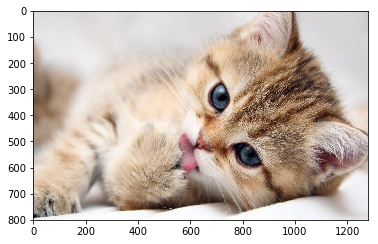

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

import skimage.io, skimage.color

image = skimage.io.imread('kitten.jpg')
y, x, n_channels = image.shape
print('表示图像的numpy数组的尺寸是{}: {}代表竖直方向的像素个数，{}代表水平方向像素个数，{}代表表示每个像素需要的红绿蓝三种颜色。'.format(image.shape, y, x, n_channels))
plt.imshow(image)
# plt.axis('off')

离散化：
放大图像的一小部分显示。粗糙的像素出现了


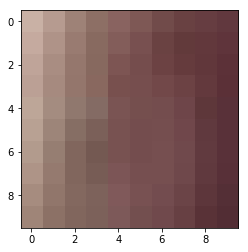

In [15]:
print('离散化：')
print('放大图像的一小部分显示。粗糙的像素出现了')
clipped = image[316:326, 668:678]
plt.imshow(clipped)
# plt.axis('off')

In [6]:
print('量化：')
print('numpy数组的数据类型是{}：每一个像素的每一个channel用0到255之间的一个整数表示。'.format(image.dtype))

量化：
numpy数组的数据类型是uint8：每一个像素的每一个channel用0到255之间的一个整数表示。


转换为黑白图像：
黑白图像的尺寸为：(800, 1280)；原彩色图像尺寸为(800, 1280, 3)，转换成黑白之后3消失了，因为只需一个数字就可以表示一个像素的颜色


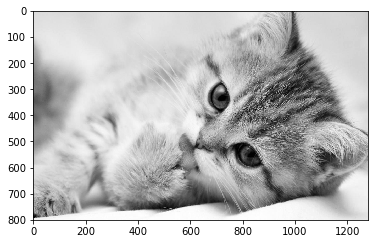

In [16]:
print('转换为黑白图像：')
gray = skimage.color.rgb2gray(image)
print('黑白图像的尺寸为：{}；原彩色图像尺寸为{}，转换成黑白之后3消失了，因为只需一个数字就可以表示一个像素的颜色'.format(gray.shape, image.shape))
plt.imshow(gray, cmap='gray')

总结来说，一张真实世界中的图像，就是通过离散化和量化的处理，变成数字储存在计算机里的。人类眼中色彩缤纷的大千世界，在计算机眼里竟然只是一堆数字！对世界的理解方式如此不同，无怪乎计算机的图像处理和视觉问题那么困难。


## 卷积操作

简单期间，在这一节里我们用黑白图像来讲解卷积操作，而彩色图像的卷积和单色图像非常类似。

在Photoshop或其他修图软件里，有一类称为滤镜（filter）的操作(如模糊，锐化)，来对图像整体或某个区域进行修理。大部分的滤镜在数学上都对应到一种称为卷积（convolution）的操作。下面我们看一看图像的卷积如何计算，以及一些用卷积实现的滤镜的例子。

### 计算方法

我们来看一个计算卷积的例子：
<img src="conv_example.png" width="400px">
卷积操作需要两个输入：图像和**核**(**kernel**)。核与图像一样，是一个二维数组，里面的每个数被称为**权重**。

第一步：将核与图像左上角对齐：
<img src="conv_step1.png" width="400px">
然后把每个权重乘以对应的图像像素，再把这些乘积加起来作为卷积的结果：
$$
\begin{equation*}
\begin{matrix}
&1 \times 1 & + & 1 \times 0 & + & 1 \times 1 \\
+&0 \times 0 & + & 1 \times 1 & + & 1 \times 0 \\
+&0 \times 1 & + & 0 \times 0 & + & 1 \times 1 \\
\end{matrix} = 4
\end{equation*}
$$
第二步：把核向右平移一个像素：
<img src="conv_step2.png" width="400px">
把每个权重乘以对应的图像像素，再把这些乘积加起来作为卷积的结果。

第三步：下面该做什么，相信同学们都猜到了。我们以一个动画来演示卷积整个计算过程：
<img src="conv_animation.gif" width="400px">
(来源：网络)

### 例子：模糊，锐化，边缘检测


原图像


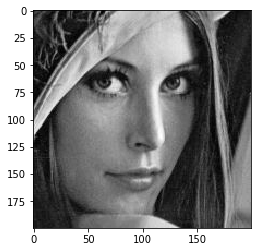

In [17]:
import numpy as np
from scipy.ndimage.filters import convolve

image = skimage.io.imread('lena.jpg')
image = image[200:400, 200:400]
image = image.astype(np.float32) / 255

print('原图像')
plt.imshow(image, cmap='gray')

模糊核：
[[ 0.0625  0.125   0.0625]
 [ 0.125   0.25    0.125 ]
 [ 0.0625  0.125   0.0625]]
模糊图像


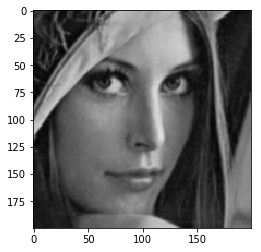

In [18]:
blur_kernel = np.array([[0.0625, 0.125, 0.0625], [0.125, 0.25, 0.125], [0.0625, 0.125, 0.0625]])
print('模糊核：')
print(blur_kernel)
print('模糊图像')
# blur_kernel = np.ones((3, 3)) / 9
blurred_image = convolve(image, blur_kernel)
plt.imshow(blurred_image, cmap='gray', vmin=0, vmax=1)

模糊核：
[[1 1 1]
 [1 1 1]
 [1 1 1]]
模糊图像


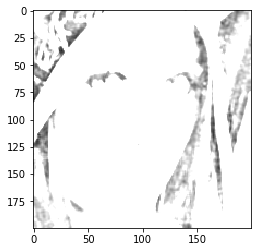

In [20]:
blur_kernel = np.array([[1, 1, 1], [1, 1,1], [1, 1, 1]])
print('模糊核：')
print(blur_kernel)
print('模糊图像')
# blur_kernel = np.ones((3, 3)) / 9
blurred_image = convolve(image, blur_kernel)
plt.imshow(blurred_image, cmap='gray', vmin=0, vmax=1)

模糊核：
[[0 0 0]
 [0 1 0]
 [0 0 0]]
模糊图像


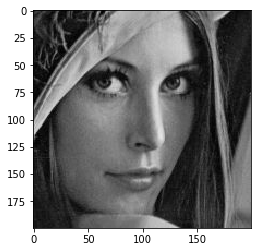

In [21]:
blur_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
print('模糊核：')
print(blur_kernel)
print('模糊图像')
# blur_kernel = np.ones((3, 3)) / 9
blurred_image = convolve(image, blur_kernel)
plt.imshow(blurred_image, cmap='gray', vmin=0, vmax=1)

模糊核：
[[ 0.2  0.4  0.2]
 [ 0.4  0.6  0.4]
 [ 0.2  0.4  0.2]]
模糊图像


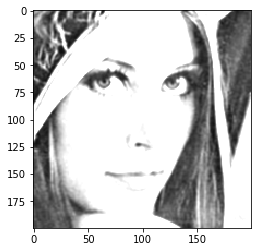

In [10]:
blur_kernel = np.array([[0.2, 0.4, 0.2], [0.4, 0.6, 0.4], [0.2, 0.4, 0.2]])
print('模糊核：')
print(blur_kernel)
print('模糊图像')
# blur_kernel = np.ones((3, 3)) / 9
blurred_image = convolve(image, blur_kernel)
plt.imshow(blurred_image, cmap='gray', vmin=0, vmax=1)

锐化核：
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]
锐化图像


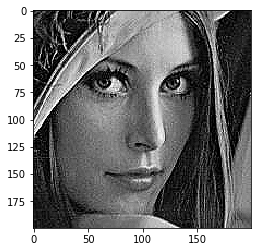

In [11]:
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
print('锐化核：')
print(sharpen_kernel)
print('锐化图像')
# blur_kernel = np.ones((3, 3)) / 9
sharpen_image = convolve(image, sharpen_kernel)
plt.imshow(sharpen_image, cmap='gray', vmin=0, vmax=1)

锐化核：
[[ 0 -2  0]
 [-2  9 -2]
 [ 0 -2  0]]
锐化图像


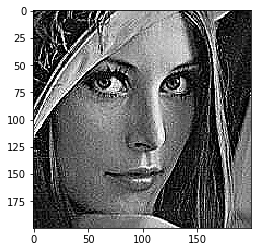

In [12]:
sharpen_kernel = np.array([[0, -2, 0], [-2, 9, -2], [0, -2, 0]])
print('锐化核：')
print(sharpen_kernel)
print('锐化图像')
# blur_kernel = np.ones((3, 3)) / 9
sharpen_image = convolve(image, sharpen_kernel)
plt.imshow(sharpen_image, cmap='gray', vmin=0, vmax=1)

边缘检测核：
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]
边缘检测结果


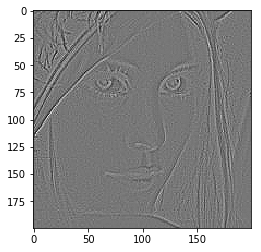

In [26]:
edge_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
print('边缘检测核：')
print(edge_kernel)
print('边缘检测结果')
# blur_kernel = np.ones((3, 3)) / 9
edge_image = convolve(image, edge_kernel)
plt.imshow(edge_image, cmap='gray')

边缘检测核：
[[ 0  1  0]
 [ 1 -5  1]
 [ 0  1  0]]
边缘检测结果


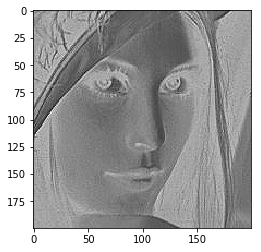

In [13]:
edge_kernel = np.array([[0, 1, 0], [1, -5, 1], [0, 1, 0]])
print('边缘检测核：')
print(edge_kernel)
print('边缘检测结果')
# blur_kernel = np.ones((3, 3)) / 9
edge_image = convolve(image, edge_kernel)
plt.imshow(edge_image, cmap='gray')

由这些例子，我们看到，通过不同的核，卷积可以对图像实现丰富的操作以及特征检测（比如上面的边缘检测可以找到图像边缘所在位置，对于图像识别有很重要的意义）。而之后要讲的CNN，就是通过组合各种卷积产生的特征，实现图像识别等一系列计算机视觉的任务。

最后，下面两个页面包含非常生动的卷积操作的演示，有兴趣的同学可以体验一下：
- http://setosa.io/ev/image-kernels/
- http://matlabtricks.com/post-5/3x3-convolution-kernels-with-online-demo